In [1]:
import nltk
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("vader_lexicon")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yvonn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yvonn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yvonn\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
#Reuters

#The article states that the president of Harvard University would submmit more corrections as a response to the plagiarism allegation against her.
#This news report is very short and concise. The article only summarizes what is happening now and what happended in the past about the issue and contains no subjective opinions.

#Foxnews

#The articles states that the president of Harvard University is facing more accusations of plagiarism. Then the news articles summarizes how the president was embattled with the accusations previously.
#This news article is longer and contains more details. It includes lots of quotes from people that are associated with this issue, and used lots of descriptive language and subjective words in writing.

In [3]:
from PyPDF2 import PdfReader

reuters = PdfReader("reuters.com-Harvard president will submit dissertation edits after plagiarism allegations.pdf")
foxnews = PdfReader("foxnews.com-Embattled Harvard University President Claudine Gay hit with more plagiarism charges.pdf")
text_r = " "
text_f = " "

for i in range(len(reuters.pages)):
    page_r = reuters.pages[i]
    text_r += page_r.extract_text()
    print(text_r)

for i in range(len(foxnews.pages)):
    page_f = foxnews.pages[i]
    text_f += page_f.extract_text()
    print(text_f)

 1 / 3Gabriella BorterHarvard president will submit dissertation edits after
plagiarism allegations
reuters.com /world/us/embattled-harvard-president-will-submit-dissertation-edits-after-plagiarism-2023-12-21
Harvard University President Claudine Gay testifies before a House Education and The
Workforce Committee hearing titled "Holding Campus Leaders Accountable and Confronting
Antisemitism" on Capitol Hill in W ashington, U.S., December 5, 2023. REUTERS/Ken
Cedeno/File Photo Acquire Licensing Rights
Dec 21 (Reuters) - Harvard University's president was planning to submit three corrections to
her 1997 dissertation after a committee investigating plagiarism allegations against her found
that she had made citation errors, a university spokesperson said.
Claudine Gay , who was inaugurated as Harvard's president in September , has already
submitted corrections to two published articles in recent weeks that were the focus of a
review by the Harvard Corporation, the university's governing bo

In [4]:
#The two texts downloaded includes not only the articles themselves. Because both pdf screenshots of the articles on the website, the texts donwloaded includes irrelevant information from the website too such as author information. 

In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_r = sid.polarity_scores(text_r)
sentiment_f = sid.polarity_scores(text_f)
print("Reuters" + str(sentiment_r))
print("Foxnews" + str(sentiment_f))

Reuters{'neg': 0.07, 'neu': 0.904, 'pos': 0.026, 'compound': -0.9719}
Foxnews{'neg': 0.065, 'neu': 0.866, 'pos': 0.07, 'compound': 0.7243}


In [6]:
import pandas as pd

table1_data = {
    'Source': ['Reuters', 'Fox News', 'Which higher'],
    'Negative': [sentiment_r['neg'], sentiment_f['neg'],"Reuters"],
    'Neutral': [sentiment_r['neu'], sentiment_f['neu'],"Fox News"],
    'Positive': [sentiment_r['pos'], sentiment_f['pos'],"Reuters"],
    'Compound': [sentiment_r['compound'], sentiment_f['compound'],"Fox News"]
    
}

table1 = pd.DataFrame(table1_data)

print(table1)

         Source Negative   Neutral Positive  Compound
0       Reuters     0.07     0.904    0.026   -0.9719
1      Fox News    0.065     0.866     0.07    0.7243
2  Which higher  Reuters  Fox News  Reuters  Fox News


In [7]:
#The result shows that the Reuters article has small amount of both positive and negative sentiment, whereas the Fox News articles is mostly neutral. 
#The overall compound also shows that the the Reuters article is slightly negative, whereas the Fox News article is completely neutral.
#These findings contradict with my impressions of the articles.

In [8]:
head_r = "Harvard president will submit dissertation edits after plagiarism allegations"
head_f = "Embattled Harvard University President Claudine Gay hit with more plagiarism charges"
sentiment_header_r = sid.polarity_scores(head_r)
sentiment__header_f = sid.polarity_scores(head_f)
print("Reuters" + str(sentiment_header_r))
print("Foxnews" + str(sentiment__header_f))

Reuters{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Foxnews{'neg': 0.192, 'neu': 0.808, 'pos': 0.0, 'compound': -0.3353}


In [9]:
table2_data = {
    'Source': ['Reuters', 'Fox News', 'Which higher'],
    'Negative': [sentiment_header_r['neg'], sentiment__header_f['neg'],"Fox News"],
    'Neutral': [sentiment_header_r['neu'], sentiment__header_f['neu'],"Reuters"],
    'Positive': [sentiment_header_r['pos'], sentiment__header_f['pos'],"-"],
    'Compound': [sentiment_header_r['compound'], sentiment__header_f['compound'],"Reuters"]
    
}

table2 = pd.DataFrame(table2_data)

print(table2)

         Source  Negative  Neutral Positive Compound
0       Reuters       0.0      1.0      0.0      0.0
1      Fox News     0.192    0.808      0.0  -0.3353
2  Which higher  Fox News  Reuters        -  Reuters


In [10]:
#The result of sentiment analysis on the headlines is completely the opposite of the result of sentiment analysis on the articles overall,

In [11]:
from readability import Readability

r_text_r = Readability(text_r)
r_text_f = Readability(text_f)


In [12]:
#metric 1: Flesch-Kincaid Reading Ease
f_r = r_text_r.flesch()

print(f_r.score)
print(f_r.ease)
print(f_r.grade_levels)

f_f = r_text_f.flesch()

print(f_f.score)
print(f_f.ease)
print(f_f.grade_levels)

16.550377619402184
very_confusing
['college_graduate']
21.41115320671068
very_confusing
['college_graduate']


In [13]:
#According to Wikipedia, Flesch-Kincaid Reading Ease is one of the Flesch–Kincaid readability tests that are designed to indicate how difficult a passage in English is to understand. 
#This metric uses a specific formula and the passages' total words, total sentences, and total syllables to calculate the final score. 
#The score range is from 0-100. The higher the score calculated, the easier it is to read the passages.
#The score can also be converted to the grade levels to indicate the education needed to understand the passages.

#Based on the results, both articles are difficult to read and need college education to read the articles. The Fox News article is slightly easier to read than the Reuters article.

In [14]:
#metric 2: Dale Chall Readability
dc_r = r_text_r.dale_chall()

print(dc_r.score)
print(dc_r.grade_levels)

dc_f = r_text_f.dale_chall()

print(dc_f.score)
print(dc_f.grade_levels)

12.616721933836827
['college_graduate']
12.77964083329135
['college_graduate']


In [15]:
#According to Wikipedia, "The Dale–Chall readability formula is a readability test that provides a numeric gauge of the comprehension difficulty that readers come upon when reading a text. It uses a list of 3000 words that groups of fourth-grade American students could reliably understand, considering any word not on that list to be difficult."
#The higher the score, the more difficult to read the text. The scores can also be converted to grade level to indicate the education needed to read the text.

#Based on the results, both articles are difficult to read and need college education to read the articles. The Fox News article is slightly more difficult to read than the Reuters article.

In [16]:
#metric 3: Automated Readability Index (ARI)
ari_r = r_text_r.ari()

print(ari_r.score)
print(ari_r.grade_levels)
print(ari_r.ages)

ari_f = r_text_f.ari()

print(ari_f.score)
print(ari_f.grade_levels)
print(ari_f.ages)

20.4288288479949
['college_graduate']
[24, 100]
21.36114766486977
['college_graduate']
[24, 100]


In [17]:
#Based on this website (https://py-readability-metrics.readthedocs.io/en/latest/dale_chall.html), Dale Chall Readability is calculated based on the use of familiar words, rather than syllable or letter counts.
#The higher the score, the more difficult to read the text. The scores can also be converted to grade level to indicate the education needed to read the text.

#Based on the results, both articles are difficult to read and need college education to read the articles. The Fox News article is slightly more difficult to read than the Reuters article.

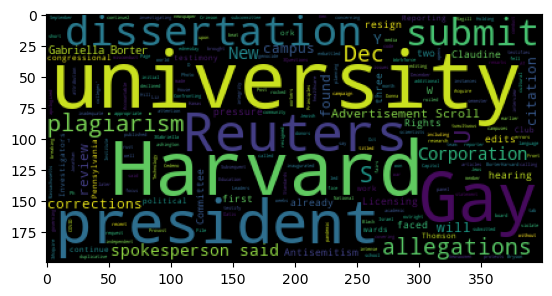

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

cloud_r = WordCloud(stopwords=STOPWORDS).generate(text_r)
plt.imshow(cloud_r)

In [19]:
#Based on the wordcloud, "Harvard", "University", "President", "Gay" are the most frequently used words. Reuters are also used very frequently, but it is because the text includes both article and website information from the Reuters website.

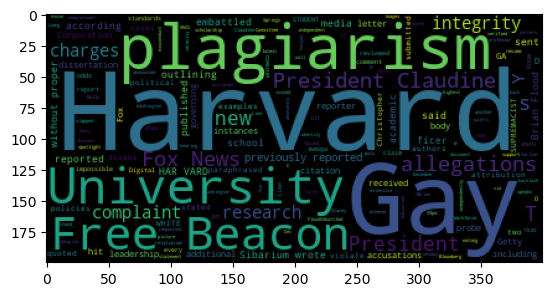

In [20]:
cloud_f = WordCloud(stopwords=STOPWORDS).generate(text_f)
plt.imshow(cloud_f)

In [21]:
#Based on the wordcloud, "Harvard", "Gay", "University", "Plagiarism", "President" are the most frequently used words. 